In [1]:
#importing libraries
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
nltk.download('stopwords')
nltk.download('wordnet')

# Loading the dataset
df = pd.read_csv('/content/sentimentdataset.csv')

#printing the first 5 lines of the dataset
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [2]:
# Dropping unwanted columns
df.drop(columns='Unnamed: 0.1', inplace=True)
df.rename(columns={'Unnamed: 0': 'Id'}, inplace=True)

In [3]:
df.head()

,Id,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [4]:
# Checking for missing values
df.isnull().sum()

# Displaying the column data types
df.dtypes

,0
Id,int64
Text,object
Sentiment,object
Timestamp,object
User,object
Platform,object
Hashtags,object
Retweets,float64
Likes,float64
Country,object


In [5]:
# Converting Timestamp to datetime format, for standardization of the dataset
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Day'] = df['Timestamp'].dt.day
df['Month'] = df['Timestamp'].dt.month
df['Year'] = df['Timestamp'].dt.year

In [6]:
df.head()

,Id,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [7]:
# Removing spaces from columns
df['Text'] = df['Text'].str.strip()
df['Sentiment'] = df['Sentiment'].str.strip()
df['User'] = df['User'].str.strip()
df['Platform'] = df['Platform'].str.strip()
df['Hashtags'] = df['Hashtags'].str.strip()
df['Country'] = df['Country'].str.strip()

In [8]:
df.head()

,Id,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,Enjoying a beautiful day at the park!,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,Traffic was terrible this morning.,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,Just finished an amazing workout! 💪,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,Excited about the upcoming weekend getaway!,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,Trying out a new recipe for dinner tonight.,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [9]:
# Statistics of the dataset
df.describe()

,Id,Timestamp,Retweets,Likes,Year,Month,Day,Hour
count,732.000000,732,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000
mean,369.740437,2020-12-08 21:37:38.196721408,21.508197,42.901639,2020.471311,6.122951,15.497268,15.521858
min,0.000000,2010-05-15 15:30:00,5.000000,10.000000,2010.000000,1.000000,1.000000,0.000000
25%,185.750000,2019-03-08 17:27:30,17.750000,34.750000,2019.000000,3.000000,9.000000,13.000000
50%,370.500000,2021-09-20 14:30:00,22.000000,43.000000,2021.000000,6.000000,15.000000,16.000000
75%,553.250000,2023-02-26 11:48:45,25.000000,50.000000,2023.000000,9.000000,22.000000,19.000000
max,736.000000,2023-10-22 20:45:00,40.000000,80.000000,2023.000000,12.000000,31.000000,23.000000
std,212.428936,NaN,7.061286,14.089848,2.802285,3.411763,8.474553,4.113414


# **Exploratory Data Analysis**

1. Sentiment distribution in the dataset.
  * We find the top 10 text based sentiments
  * Analyzing the sentiment distribution helps us understand how balanced the dataset is across Positive, Negative, and Neutral classes, which is important for choosing the right modeling and evaluation strategies.
  * Reviewing the top 10 posts for each sentiment provides insights into how users express emotions, highlights common patterns or keywords, and helps guide feature engineering.
  * It also makes the analysis more relatable by showing real examples of product praise, complaints, or neutral feedback.

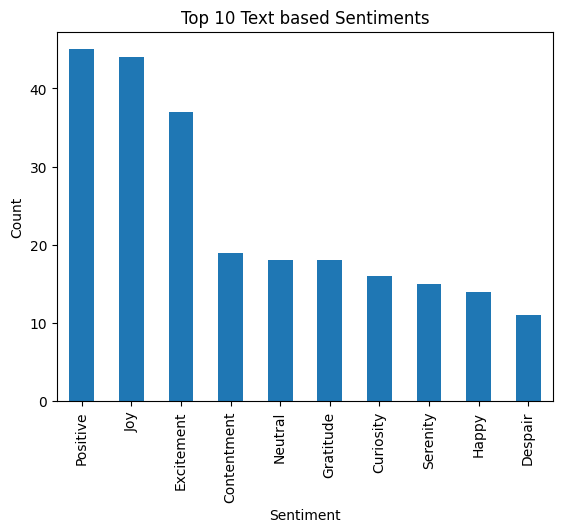

In [10]:
df['Sentiment'].value_counts().nlargest(10).plot(kind='bar')
plt.title('Top 10 Text based Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

Top 10 text based sentiments are-


1.   Positivity
2.   Joy
3.   Excietment
4.   Contentment
5.   Neutral
6.   Gratitude
7.   Curiosity
8.   serenity
9.   Happy
10.  Despair



2. Distribution of dataset based on platforms
 * Distribution of the dataset based on the platforms.
 * Analyzing the distribution of posts across different platforms helps us understand where users are most active and where product-related feedback is coming from.
 * This insight is useful for comparing sentiment trends, engagement levels, and user behavior across platforms like Twitter, Instagram, or Facebook, and can guide platform-specific analysis or model tuning.

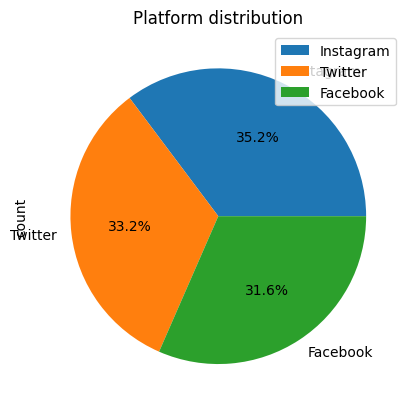

In [11]:
df['Platform'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Platform distribution')
plt.legend()
plt.show()

Platform distriution in descending order  is as follows-



*   Instagram-35.2%
*   Twitter-33.2%
*   Facebook-31.6%






3. Distribution of dataset based on Country
  * We find the top 10 countires with the most abount of feedbacks.
  * Analyzing the distribution of posts by country helps identify where most feedback is originating from, revealing regional differences in user activity.
  * This can provide valuable context for understanding sentiment trends, cultural differences in expression, and help in tailoring insights or strategies for specific markets.

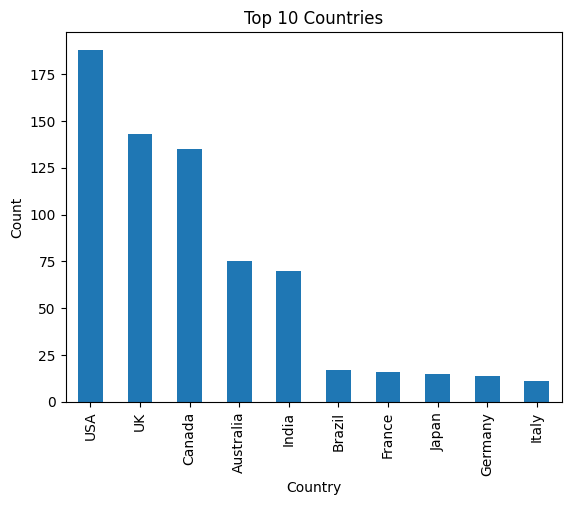

In [12]:
df['Country'].value_counts().nlargest(10).plot(kind='bar')
plt.title('Top 10 Countries')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

Top 10 countries-


1.   USA
2.   UK
3.   Canada
4.   Australia
5.   India
6.   Brazil
7.   France
8.   Japan
9.   Germany
10.  Italy




4. Distribution of dataset based on Hashtags
  * We find the top 10 most used hashtags
  * Analyzing the distribution of hashtags helps identify the most commonly discussed topics or themes in the dataset.
  * This provides insights into what products, features, or campaigns users are talking about, and helps link sentiment with specific trends or brand-related discussions.

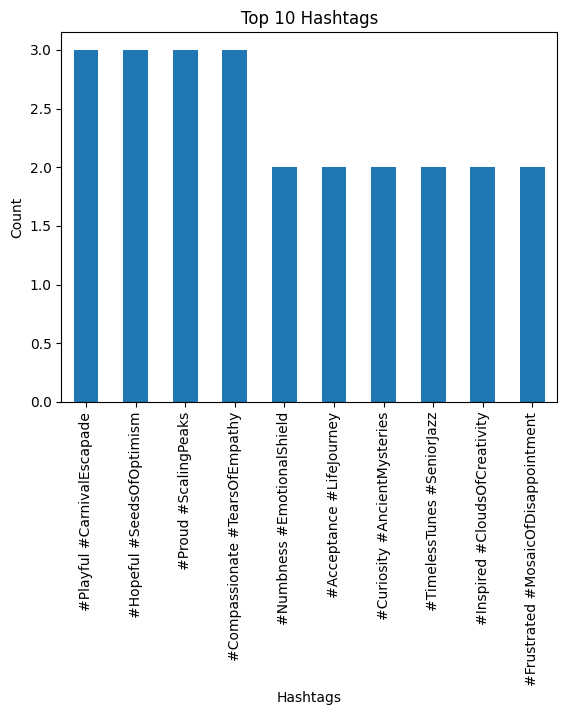

In [13]:
df['Hashtags'].value_counts().nlargest(10).plot(kind='bar')
plt.title('Top 10 Hashtags')
plt.xlabel('Hashtags')
plt.ylabel('Count')
plt.show()

Top 10 Hashtags-



*   #Playful #CarnivalEscapade
*   #Hopeful #SeedsOfOptimism
*   #Proud #ScalingPeaks
*   #Compassionate #TearsOfEmpathy
*   #Numbness #EmotionalShield
*   #Acceptance #Lifejourney
*   #Curiosity #AncientMysteries
*   #TimelessTunes #Seniorjazz
*   #Inspired #CloudsOfCreativity
*   #Frustrated #MosaicOfDisappointment

5. Analyzing the numeric columns
  * Analyzing the range of numerical columns like day, month, year, likes, and retweets helps us understand the time span of the dataset and the variation in user engagement.
  * This gives a sense of when the data was collected and how widely engagement levels fluctuate across posts.

In [14]:
numerical_columns = df[['Day', 'Month', 'Year', 'Likes', 'Retweets']]
for col in numerical_columns.columns:
    print(f"Minimum {col}: {df[col].min()} | Maximum {col}: {df[col].max()}")

Minimum Day: 1 | Maximum Day: 31
Minimum Month: 1 | Maximum Month: 12
Minimum Year: 2010 | Maximum Year: 2023
Minimum Likes: 10.0 | Maximum Likes: 80.0
Minimum Retweets: 5.0 | Maximum Retweets: 40.0


* The dataset consists of feedback from Facebbok, Twitter and Instagram from the years 2010 to 2023.
* Minimum number of likes given to any post is 10 and maximum is 80.
* Minimum number of retweets given to any post is 5 and maximum is 40.

6. Top 10 hashtags by retweets
  * We find the top 10 hashtags which are the most retweeted ones.
  * Identifying the top 10 hashtags by retweets helps us understand which topics or campaigns gained the most traction and engagement.
  * This reveals what content resonated most with users and can highlight viral trends or key areas of interest related to the product.


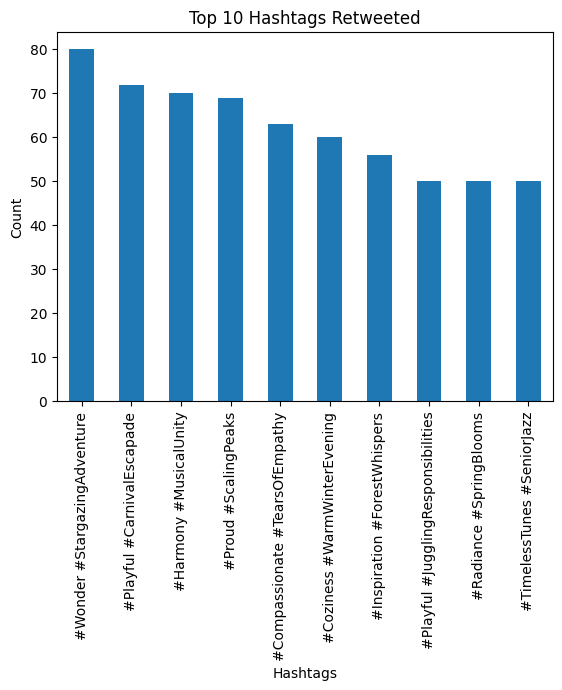

In [15]:
H_R = df.groupby('Hashtags')['Retweets'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')
plt.title('Top 10 Hashtags Retweeted')
plt.xlabel('Hashtags')
plt.ylabel('Count')
plt.show()

Top 10 Hashtags by retweets-
* #Wonder #StargazingAdventure
* #Playful #CarnivalEscapade
* #Harmony #MusicalUnity
* #Proud #ScalingPeaks
* #Compassionate#TearsOfEmpathy
* #Coziness #WarmWinterEvening
* #Inspiration #ForestWhispers
* #Playful #JugglingResponsibilities
* #Radiance #SpringBlooms
* #TimelessTunes #Seniorjazz

7. Platform with the most likes
  * Identifying the platform with the most likes helps us understand where user engagement is highest.
  * This insight can guide platform-specific strategies by showing which social media channel generates the most positive attention or interest around product-related content.

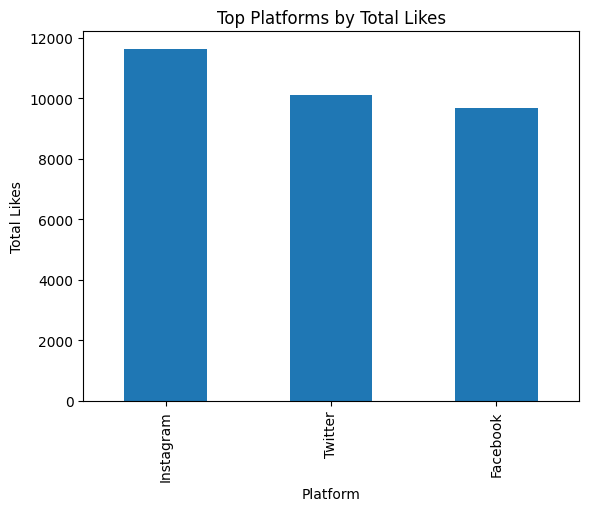

In [16]:
top_likes_platform = df.groupby('Platform')['Likes'].sum().nlargest(10)
top_likes_platform.plot(kind='bar')
plt.title('Top Platforms by Total Likes')
plt.xlabel('Platform')
plt.ylabel('Total Likes')
plt.show()

Instagram has the most likes among the three platforms.

8. Country with the most likes.
  * Identifying the top 10 countries with the most likes reveals where user engagement is strongest geographically.
  * This helps in understanding regional interest or satisfaction levels and can inform targeted marketing or customer support strategies in high-engagement areas.

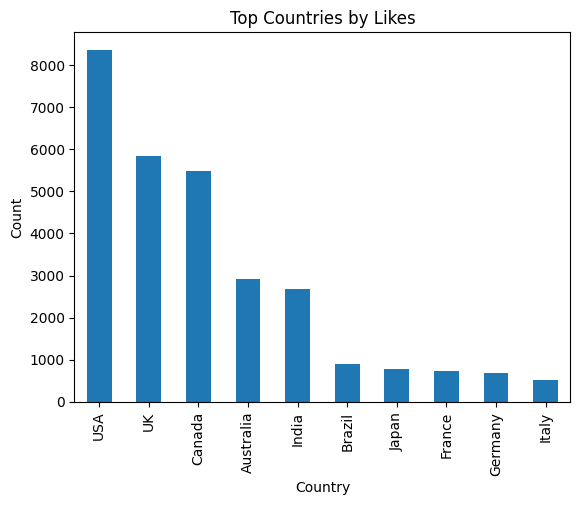

In [17]:
top_country_likes = df.groupby('Country')['Likes'].sum().nlargest(10)
top_country_likes.plot(kind='bar')
plt.title('Top Countries by Likes')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

**SEGMENTATION BY PLATFORM-**

  * Segmenting the dataset by platform allows us to compare user behavior, sentiment trends, and engagement levels across different social media channels.
  * This helps in identifying platform-specific patterns and tailoring analysis or strategies based on how users interact on each platform.

**FACEBOOK**

In [18]:
Facebook = df[df['Platform'] == 'Facebook']

9. Find the top 10 most retweeted hashtags on Facebook
  * Identifying the top 10 most retweeted hashtags on Facebook helps reveal which topics or campaigns gained the most visibility and interaction on that specific platform.
  * This provides insights into what content performs well on Facebook and highlights trends that resonate with its user base.

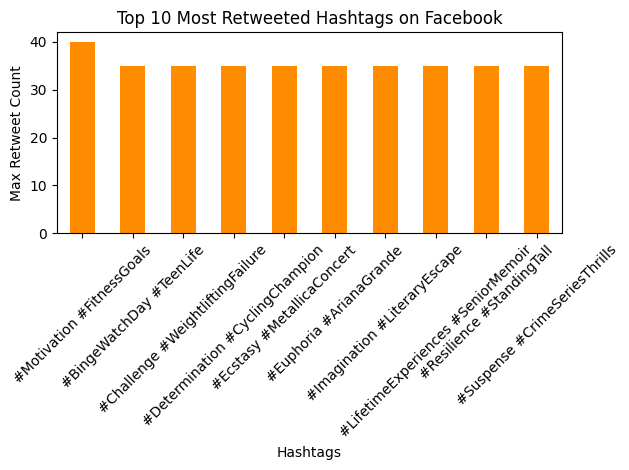

In [19]:
H_R_f = Facebook.groupby('Hashtags')['Retweets'].max().nlargest(10).sort_values(ascending=False)

# Ploting a bar chart for this visualization
H_R_f.plot(kind='bar', color='darkorange')

plt.title('Top 10 Most Retweeted Hashtags on Facebook')
plt.xlabel('Hashtags')
plt.ylabel('Max Retweet Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


10. Identify the top 10 users on Facebook based on total likes received
  * Identifying the top 10 users on Facebook based on total likes received helps highlight the most influential or engaging accounts in the dataset.
  * This provides insight into which users drive the most interaction, making them key voices in product-related discussions on the platform.

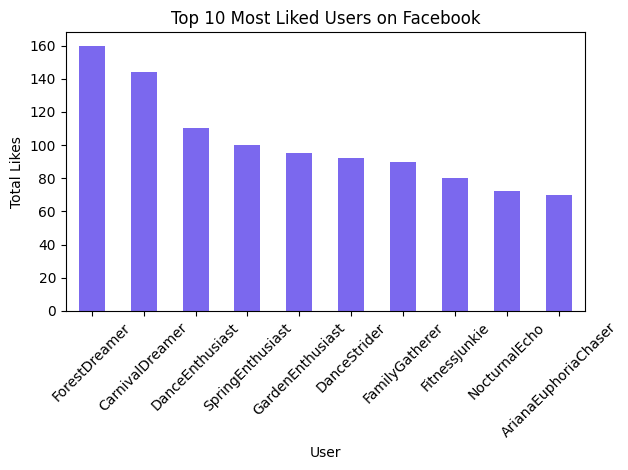

In [20]:
top_likes_platform_F = Facebook.groupby('User')['Likes'].sum().nlargest(10)

# Plot a bar chart to visualize this
top_likes_platform_F.plot(kind='bar', color='mediumslateblue')

plt.title('Top 10 Most Liked Users on Facebook')
plt.xlabel('User')
plt.ylabel('Total Likes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


11. Compute total number of likes per year on Facebook
  * Computing the total number of likes per year on Facebook helps identify engagement trends over time.
  * This reveals how user interaction with content has evolved annually and can highlight periods of peak interest or successful product-related activity.

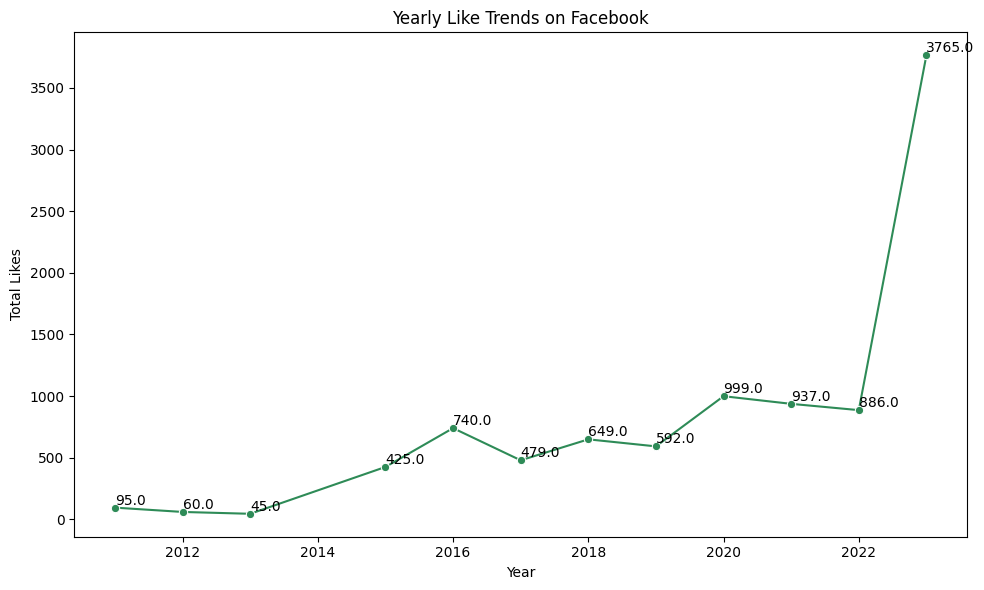

In [21]:
f = Facebook.groupby('Year')['Likes'].sum().reset_index()

# Create a line plot to visualize this trend
plt.figure(figsize=(10, 6))
sns.lineplot(data=f, x='Year', y='Likes', marker='o', color='seagreen')

for index, value in f.iterrows():
    plt.text(value['Year'], value['Likes'], str(value['Likes']), ha='left', va='bottom')

plt.title('Yearly Like Trends on Facebook')
plt.xlabel('Year')
plt.ylabel('Total Likes')
plt.tight_layout()
plt.show()


12. Calculate total number of retweets per year on Facebook
 * Calculating the total number of retweets per year on Facebook helps track how content sharing behavior has changed over time.
 * This insight reveals engagement patterns across years and can highlight periods of high user activity or interest around specific topics or product launches.

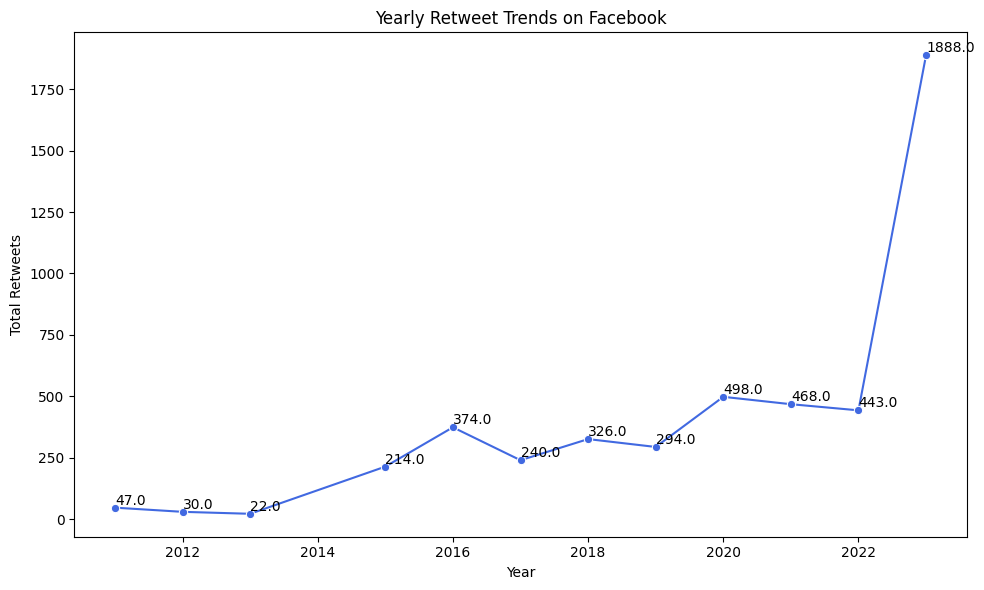

In [22]:
f = Facebook.groupby('Year')['Retweets'].sum().reset_index()

# Plot a line chart to visualize this
plt.figure(figsize=(10, 6))
sns.lineplot(data=f, x='Year', y='Retweets', marker='o', color='royalblue')

for index, value in f.iterrows():
    plt.text(value['Year'], value['Retweets'], str(value['Retweets']), ha='left', va='bottom')

plt.title('Yearly Retweet Trends on Facebook')
plt.xlabel('Year')
plt.ylabel('Total Retweets')
plt.tight_layout()
plt.show()


**TWITTER**

In [23]:
Twitter = df[df['Platform'] == 'Twitter']

13. Find the top 10 hashtags on Twitter based on their maximum retweet count
  * Finding the top 10 hashtags on Twitter based on their maximum retweet count helps identify the most viral or impactful topics on the platform.
  * This highlights which discussions gained the most attention and can guide content strategy by showing what resonates most with Twitter users.

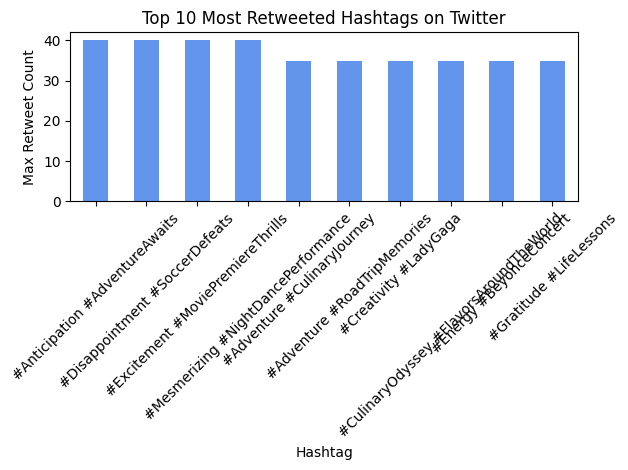

In [24]:
H_R_t = Twitter.groupby('Hashtags')['Retweets'].max().nlargest(10).sort_values(ascending=False)

# Plot a bar chart to visualize this
H_R_t.plot(kind='bar', color='cornflowerblue')

plt.title('Top 10 Most Retweeted Hashtags on Twitter')
plt.xlabel('Hashtag')
plt.ylabel('Max Retweet Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


14. Identify the top 10 users on Twitter based on total likes received
  * Identifying the top 10 users on Twitter based on total likes received helps spotlight the most engaging and influential voices on the platform.
  * This insight is useful for understanding who drives the most interaction in product-related conversations and can inform influencer or outreach strategies.

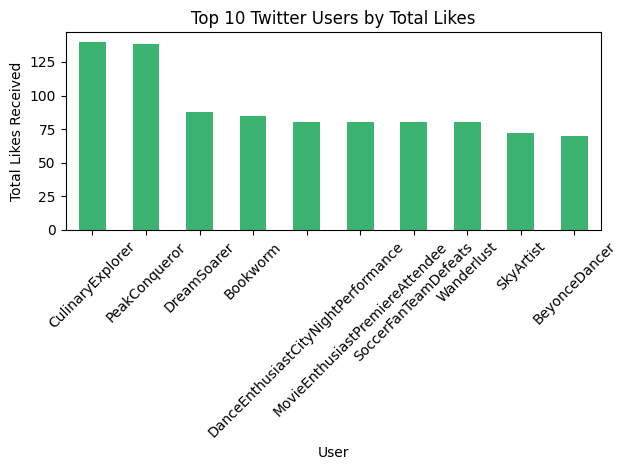

In [25]:
top_likes_platform_t = Twitter.groupby('User')['Likes'].sum().nlargest(10)

# Plot a bar chart to display this
top_likes_platform_t.plot(kind='bar', color='mediumseagreen')

plt.title('Top 10 Twitter Users by Total Likes')
plt.xlabel('User')
plt.ylabel('Total Likes Received')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


15. Calculate total likes per year for Twitter posts
  * Calculating total likes per year for Twitter posts helps reveal how user engagement has evolved over time on the platform.
  * This insight can highlight years of peak interest or successful campaigns, offering valuable context for analyzing product feedback trends.

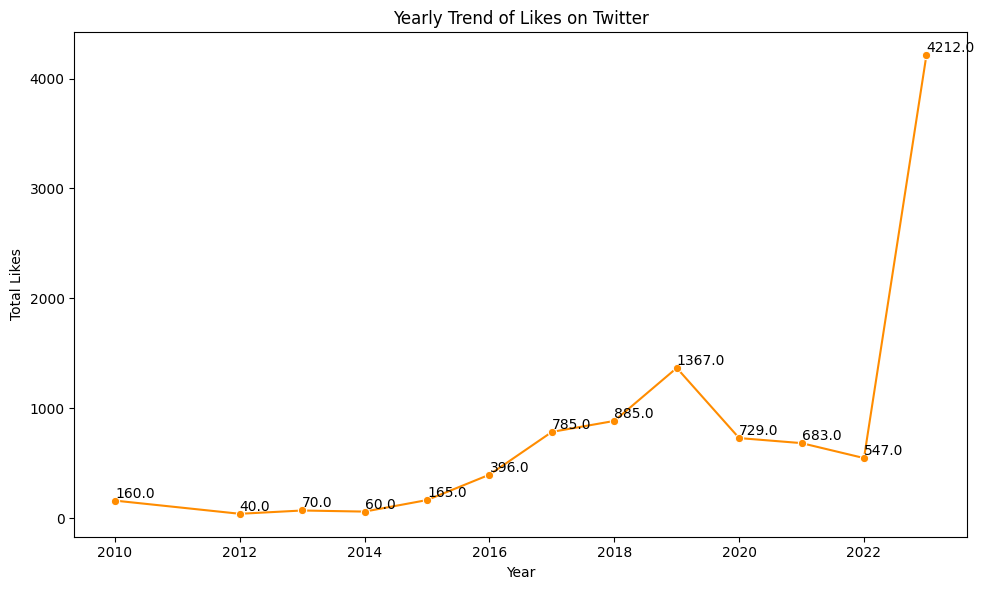

In [26]:
f = Twitter.groupby('Year')['Likes'].sum().reset_index()

# Ploting a line graph to visualize this trend
plt.figure(figsize=(10, 6))
sns.lineplot(data=f, x='Year', y='Likes', marker='o', color='darkorange')

for index, value in f.iterrows():
    plt.text(value['Year'], value['Likes'], str(value['Likes']), ha='left', va='bottom')

plt.title('Yearly Trend of Likes on Twitter')
plt.xlabel('Year')
plt.ylabel('Total Likes')
plt.tight_layout()
plt.show()


16.Calculate total retweets per year for Twitter posts
  * Calculating total retweets per year for Twitter posts helps track how content sharing has changed over time.
  * This provides insight into user amplification behavior and can highlight periods when product-related posts gained significant traction.

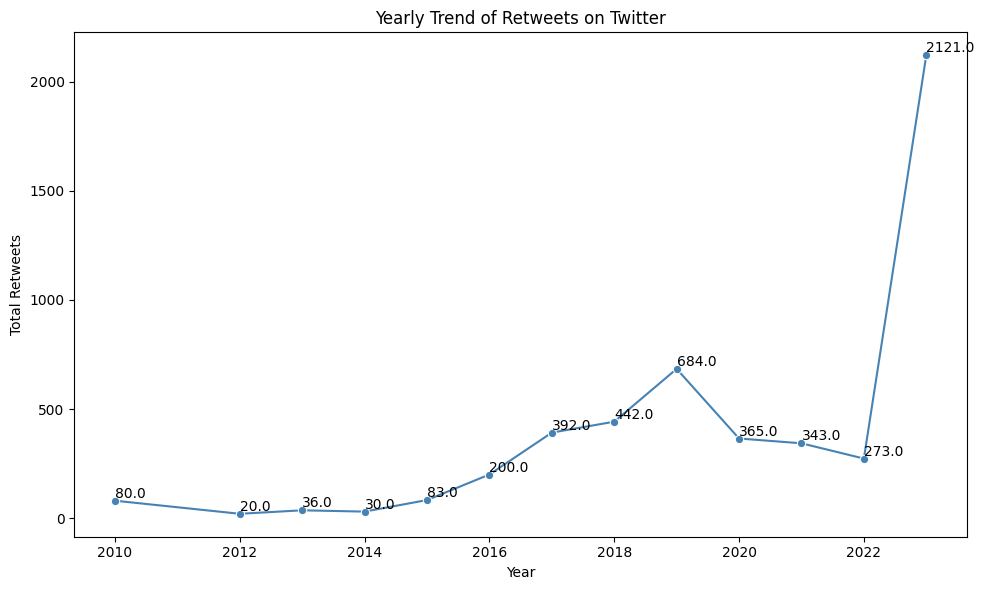

In [27]:
f = Twitter.groupby('Year')['Retweets'].sum().reset_index()

# Plot a line graph to visualize this trend
plt.figure(figsize=(10, 6))
sns.lineplot(data=f, x='Year', y='Retweets', marker='o', color='steelblue')

for index, value in f.iterrows():
    plt.text(value['Year'], value['Retweets'], str(value['Retweets']), ha='left', va='bottom')

plt.title('Yearly Trend of Retweets on Twitter')
plt.xlabel('Year')
plt.ylabel('Total Retweets')
plt.tight_layout()
plt.show()


**INSTAGRAM**

In [28]:
Instagram = df[df['Platform'] == 'Instagram']

17. Find the top 15 hashtags on Instagram based on maximum retweet count
  * Finding the top 15 hashtags on Instagram based on their maximum retweet count helps identify the most viral or impactful topics on the platform.
  * This highlights which discussions gained the most attention and can guide content strategy by showing what resonates most with Instagram users.

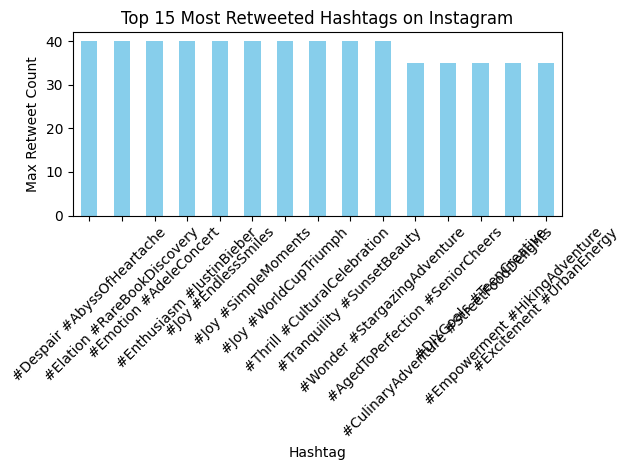

In [29]:
H_R_i = Instagram.groupby('Hashtags')['Retweets'].max().nlargest(15).sort_values(ascending=False)

# Plot a bar chart to visualize this
H_R_i.plot(kind='bar', color='skyblue')

plt.title('Top 15 Most Retweeted Hashtags on Instagram')
plt.xlabel('Hashtag')
plt.ylabel('Max Retweet Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


18. Identify the top 10 users with the highest total likes on Instagram
  * dentifying the top 10 users on Instagram based on total likes received helps spotlight the most engaging and influential voices on the platform.
  * This insight is useful for understanding who drives the most interaction in product-related conversations and can inform influencer or outreach strategies.

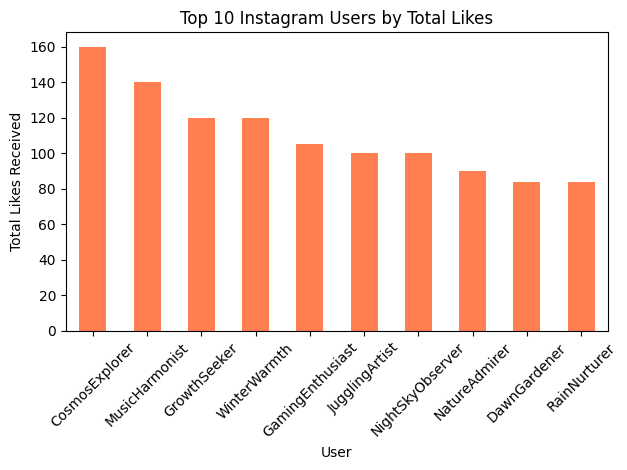

In [30]:
top_likes_platform_i = Instagram.groupby('User')['Likes'].sum().nlargest(10)

# Plot a bar chart to visualize this
top_likes_platform_i.plot(kind='bar', color='coral')

plt.title('Top 10 Instagram Users by Total Likes')
plt.xlabel('User')
plt.ylabel('Total Likes Received')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


19. Calculate total likes per year for Instagram posts

  * Calculating total likes per year for Instagram posts helps reveal how user engagement has evolved over time on the platform.
  * This insight can highlight years of peak interest or successful campaigns, offering valuable context for analyzing product feedback trends.

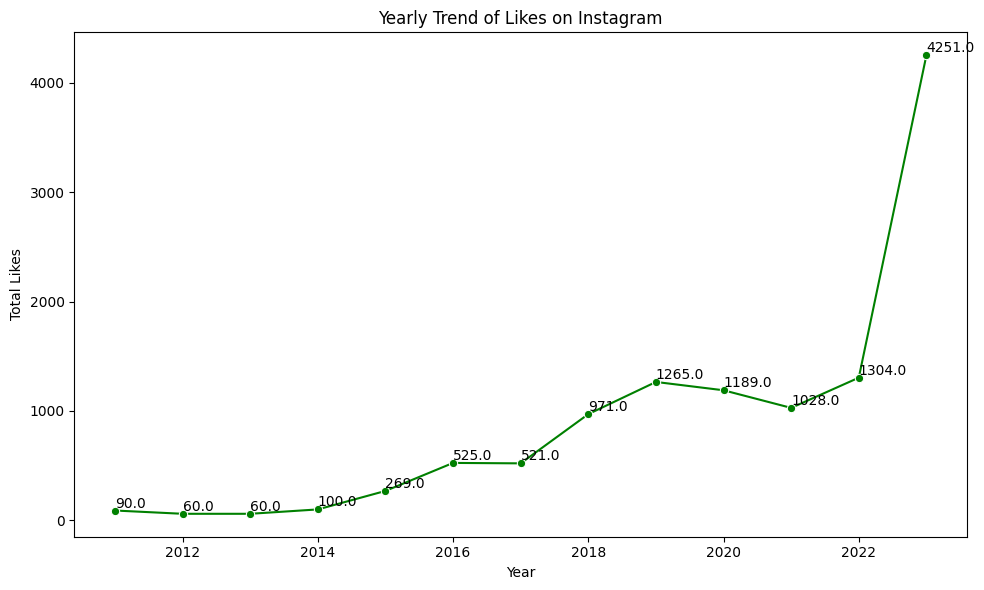

In [31]:
f = Instagram.groupby('Year')['Likes'].sum().reset_index()

# Plot a line graph to visualize this trend
plt.figure(figsize=(10, 6))
sns.lineplot(data=f, x='Year', y='Likes', marker='o', color='green')

for index, value in f.iterrows():
    plt.text(value['Year'], value['Likes'], str(value['Likes']), ha='left', va='bottom')

plt.title('Yearly Trend of Likes on Instagram')
plt.xlabel('Year')
plt.ylabel('Total Likes')
plt.tight_layout()
plt.show()


20. Calculate total retweets per year for Instagram posts
  * Calculating total retweets per year for Instagram posts helps track how content sharing has changed over time.
  * This provides insight into user amplification behavior and can highlight periods when product-related posts gained significant traction.

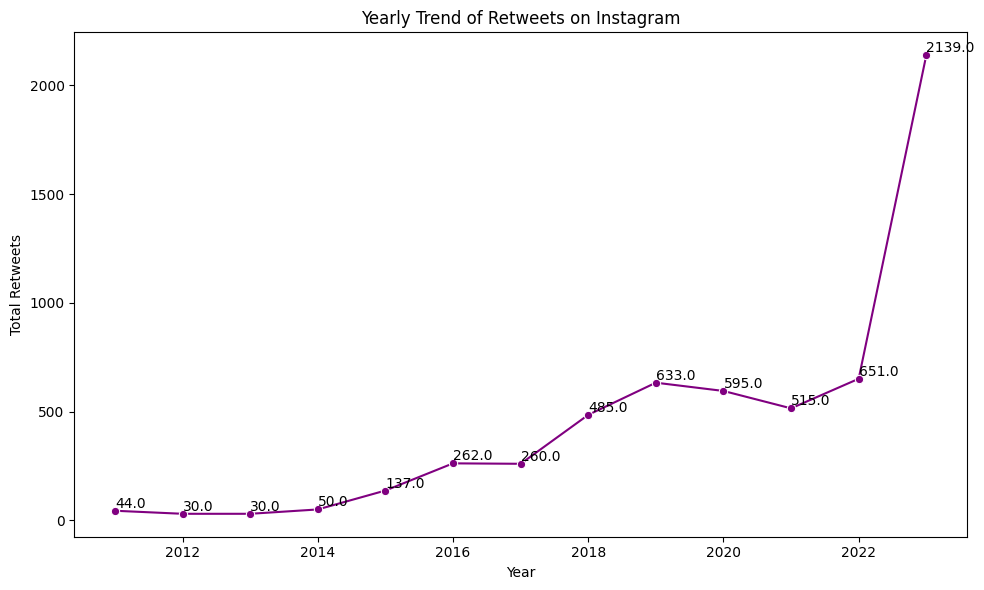

In [32]:
f = Instagram.groupby('Year')['Retweets'].sum().reset_index()

# Plot line chart showing how retweets have changed over the years
plt.figure(figsize=(10, 6))
sns.lineplot(data=f, x='Year', y='Retweets', marker='o', color='purple')

for index, value in f.iterrows():
    plt.text(value['Year'], value['Retweets'], str(value['Retweets']), ha='left', va='bottom')

plt.title('Yearly Trend of Retweets on Instagram')
plt.xlabel('Year')
plt.ylabel('Total Retweets')
plt.tight_layout()
plt.show()


21. Sentiment Distribution
  * Graphical distribution of sentiments in the dataset

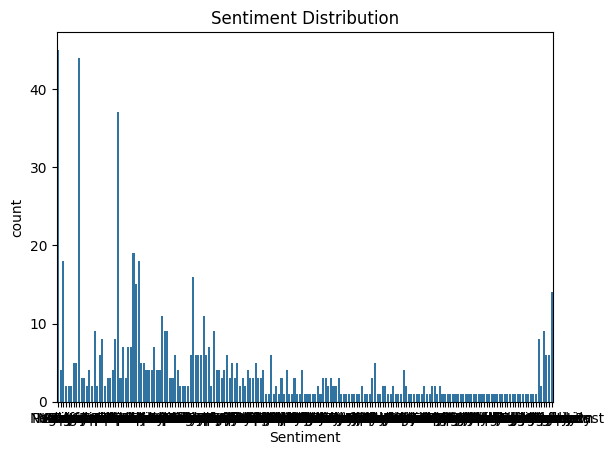

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Sentiment', data=df)
plt.title("Sentiment Distribution")
plt.show()

22. Emoji Usage by Sentiment
  * To identify if emojis are more common in certain sentiments.

In [34]:
!pip install emoji

In [35]:
import emoji

# Function to count the number of emojis in a given text
def count_emojis(text):
    return sum(1 for char in text if char in emoji.EMOJI_DATA)

# Apply emoji counting function to each post
df['emoji_count'] = df['Text'].apply(count_emojis)


23. Correlation Heatmap of Numeric Fields
  * To check relationships between likes, retweets, text length, emojis.

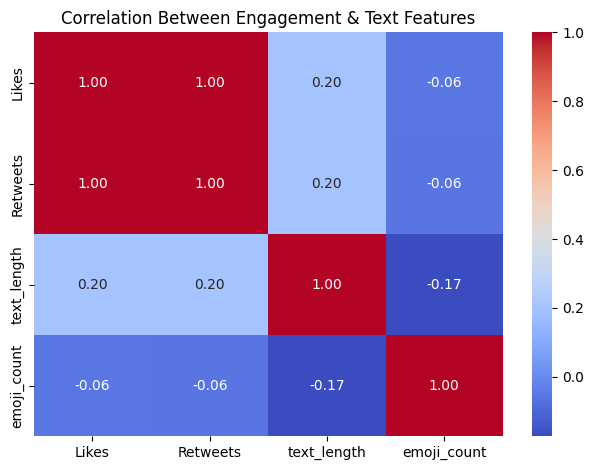

In [36]:
# Compute the number of characters in each post and store in a new column
df['text_length'] = df['Text'].apply(len)

# Calculate correlation between engagement metrics and content features
corr = df[['Likes', 'Retweets', 'text_length', 'emoji_count']].corr()

# Plot the correlation heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Engagement & Text Features")
plt.tight_layout()
plt.show()


24. TF-IDF Word Importance per Sentiment
  * To identify most unique words to each sentiment.

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Function to get top TF-IDF words for a specific sentiment class
def top_tfidf_words(class_label, top_n=10):
    # Filter posts by sentiment class
    class_texts = df[df['Sentiment'] == class_label]['Text']

    # Use TF-IDF vectorizer to extract word importance
    vec = TfidfVectorizer(max_features=5000)
    X = vec.fit_transform(class_texts)

    # Get average TF-IDF scores across all documents
    tfidf_scores = X.mean(axis=0).A1
    words = vec.get_feature_names_out()

    # Sort and return top N words by score
    top_words = sorted(zip(words, tfidf_scores), key=lambda x: -x[1])[:top_n]
    return top_words

# Print top words per sentiment class
for sentiment in df['Sentiment'].unique():
    print(f"\nTop TF-IDF words for sentiment: {sentiment}")
    for word, score in top_tfidf_words(sentiment):
        print(f"{word}: {round(score, 3)}")



Top TF-IDF words for sentiment: Positive
the: 0.072
new: 0.064
with: 0.055
of: 0.035
for: 0.034
feeling: 0.033
just: 0.032
day: 0.032
weekend: 0.031
and: 0.029

Top TF-IDF words for sentiment: Negative
feeling: 0.169
the: 0.163
morning: 0.112
terrible: 0.112
this: 0.112
traffic: 0.112
was: 0.112
bit: 0.109
today: 0.109
under: 0.109

Top TF-IDF words for sentiment: Neutral
to: 0.084
in: 0.073
for: 0.071
new: 0.07
school: 0.063
on: 0.059
with: 0.058
attending: 0.058
the: 0.054
and: 0.05

Top TF-IDF words for sentiment: Anger
after: 0.204
anger: 0.204
argument: 0.204
fuming: 0.204
heated: 0.204
with: 0.204
believe: 0.177
can: 0.177
happening: 0.177
in: 0.177

Top TF-IDF words for sentiment: Fear
the: 0.289
fear: 0.237
of: 0.237
after: 0.189
feeling: 0.189
movie: 0.189
sense: 0.189
thriller: 0.189
watching: 0.189
at: 0.144

Top TF-IDF words for sentiment: Sadness
after: 0.26
about: 0.182
bidding: 0.182
dear: 0.182
disaster: 0.182
farewell: 0.182
friend: 0.182
hearing: 0.182
heartbroken: 0

Top 10

25. Geographic Hotspots for Sentiment Outliers
  * To detect regions that are unusually negative or positive — useful for regional marketing or support.

<ipython-input-38-cb82b9daad37>:14: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


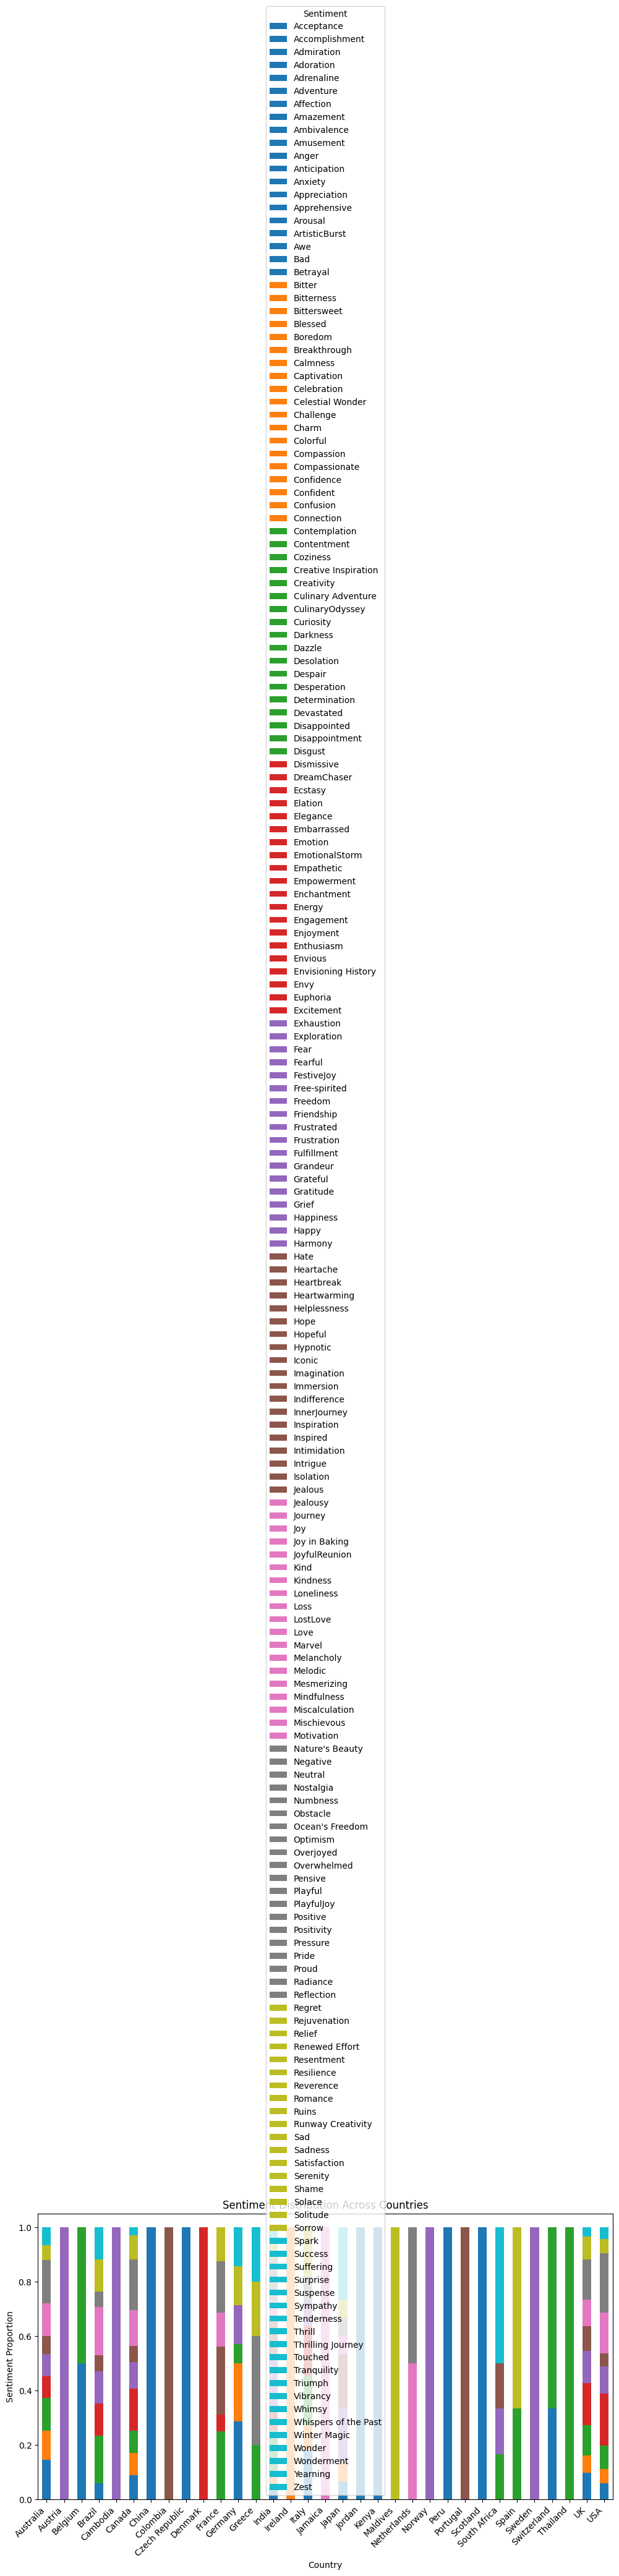

In [38]:
# Count number of posts per sentiment for each country
country_sentiment_counts = df.groupby(['Country', 'Sentiment']).size().unstack().fillna(0)

# Convert counts to proportions (percentage of sentiment per country)
country_sentiment_counts = country_sentiment_counts.div(country_sentiment_counts.sum(axis=1), axis=0)

# Plot a stacked bar chart showing sentiment distribution by country
country_sentiment_counts.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab10')
plt.title("Sentiment Distribution Across Countries")
plt.xlabel("Country")
plt.ylabel("Sentiment Proportion")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Sentiment")
plt.tight_layout()
plt.show()



26.Time to First Engagement (Engagement Velocity)
  * To see how quickly posts get attention — useful for spotting viral feedback early.

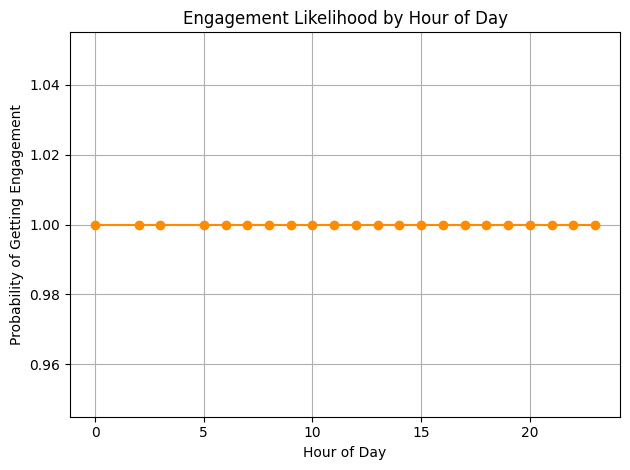

In [39]:
# Calculate total engagement for each post
df['engagement_score'] = df['Likes'] + df['Retweets']

# Flag posts that received any engagement
df['is_engaged'] = df['engagement_score'] > 0

# Group by posting hour to find engagement likelihood
engagement_rate = df.groupby('Hour')['is_engaged'].mean()

# Plot engagement likelihood by hour of the day
engagement_rate.plot(marker='o', linestyle='-', color='darkorange')
plt.title('Engagement Likelihood by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Probability of Getting Engagement')
plt.grid(True)
plt.tight_layout()
plt.show()



27. Identify the top 10 users by total engagement (likes + retweets)
    * This code aims to find the top 10 users who have the most engagement on social media and then presents this information in a bar chart.

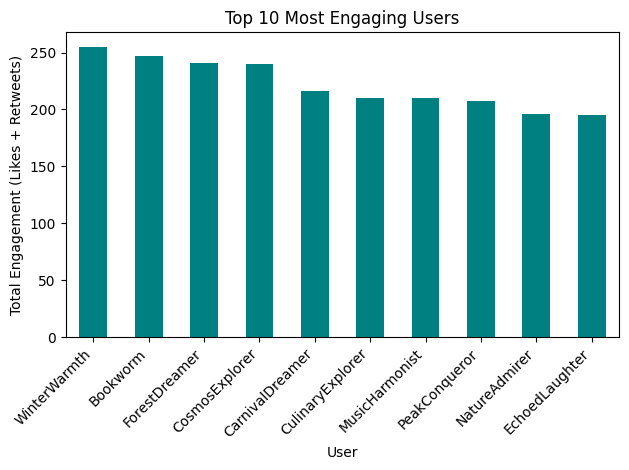

In [40]:
# Identify the top 10 users by total engagement (likes + retweets)
top_users = df.groupby('User')['engagement_score'].sum().sort_values(ascending=False).head(10)

# Plot a bar chart
top_users.plot(kind='bar', color='teal')
plt.title('Top 10 Most Engaging Users')
plt.xlabel('User')
plt.ylabel('Total Engagement (Likes + Retweets)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


28. Sentiment by Post Type or Intent (Question vs. Statement)
 * This will helps businesses distinguish between feedback, praise, and queries.

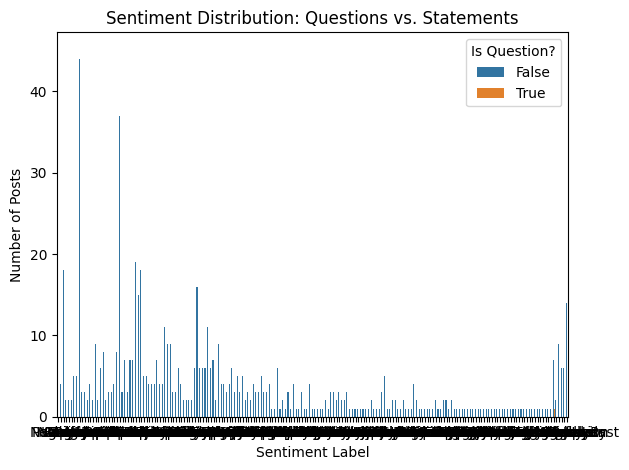

In [41]:
# Identify posts that are questions
df['is_question'] = df['Text'].str.endswith('?')

# Plot distribution of sentiment labels split by whether the post is a question
sns.countplot(x='Sentiment', hue='is_question', data=df)
plt.title("Sentiment Distribution: Questions vs. Statements")
plt.xlabel("Sentiment Label")
plt.ylabel("Number of Posts")
plt.legend(title="Is Question?")
plt.tight_layout()
plt.show()



29. Hashtag Co-Occurrence Network
  * This helps to identify communities of related product discussions or campaigns.

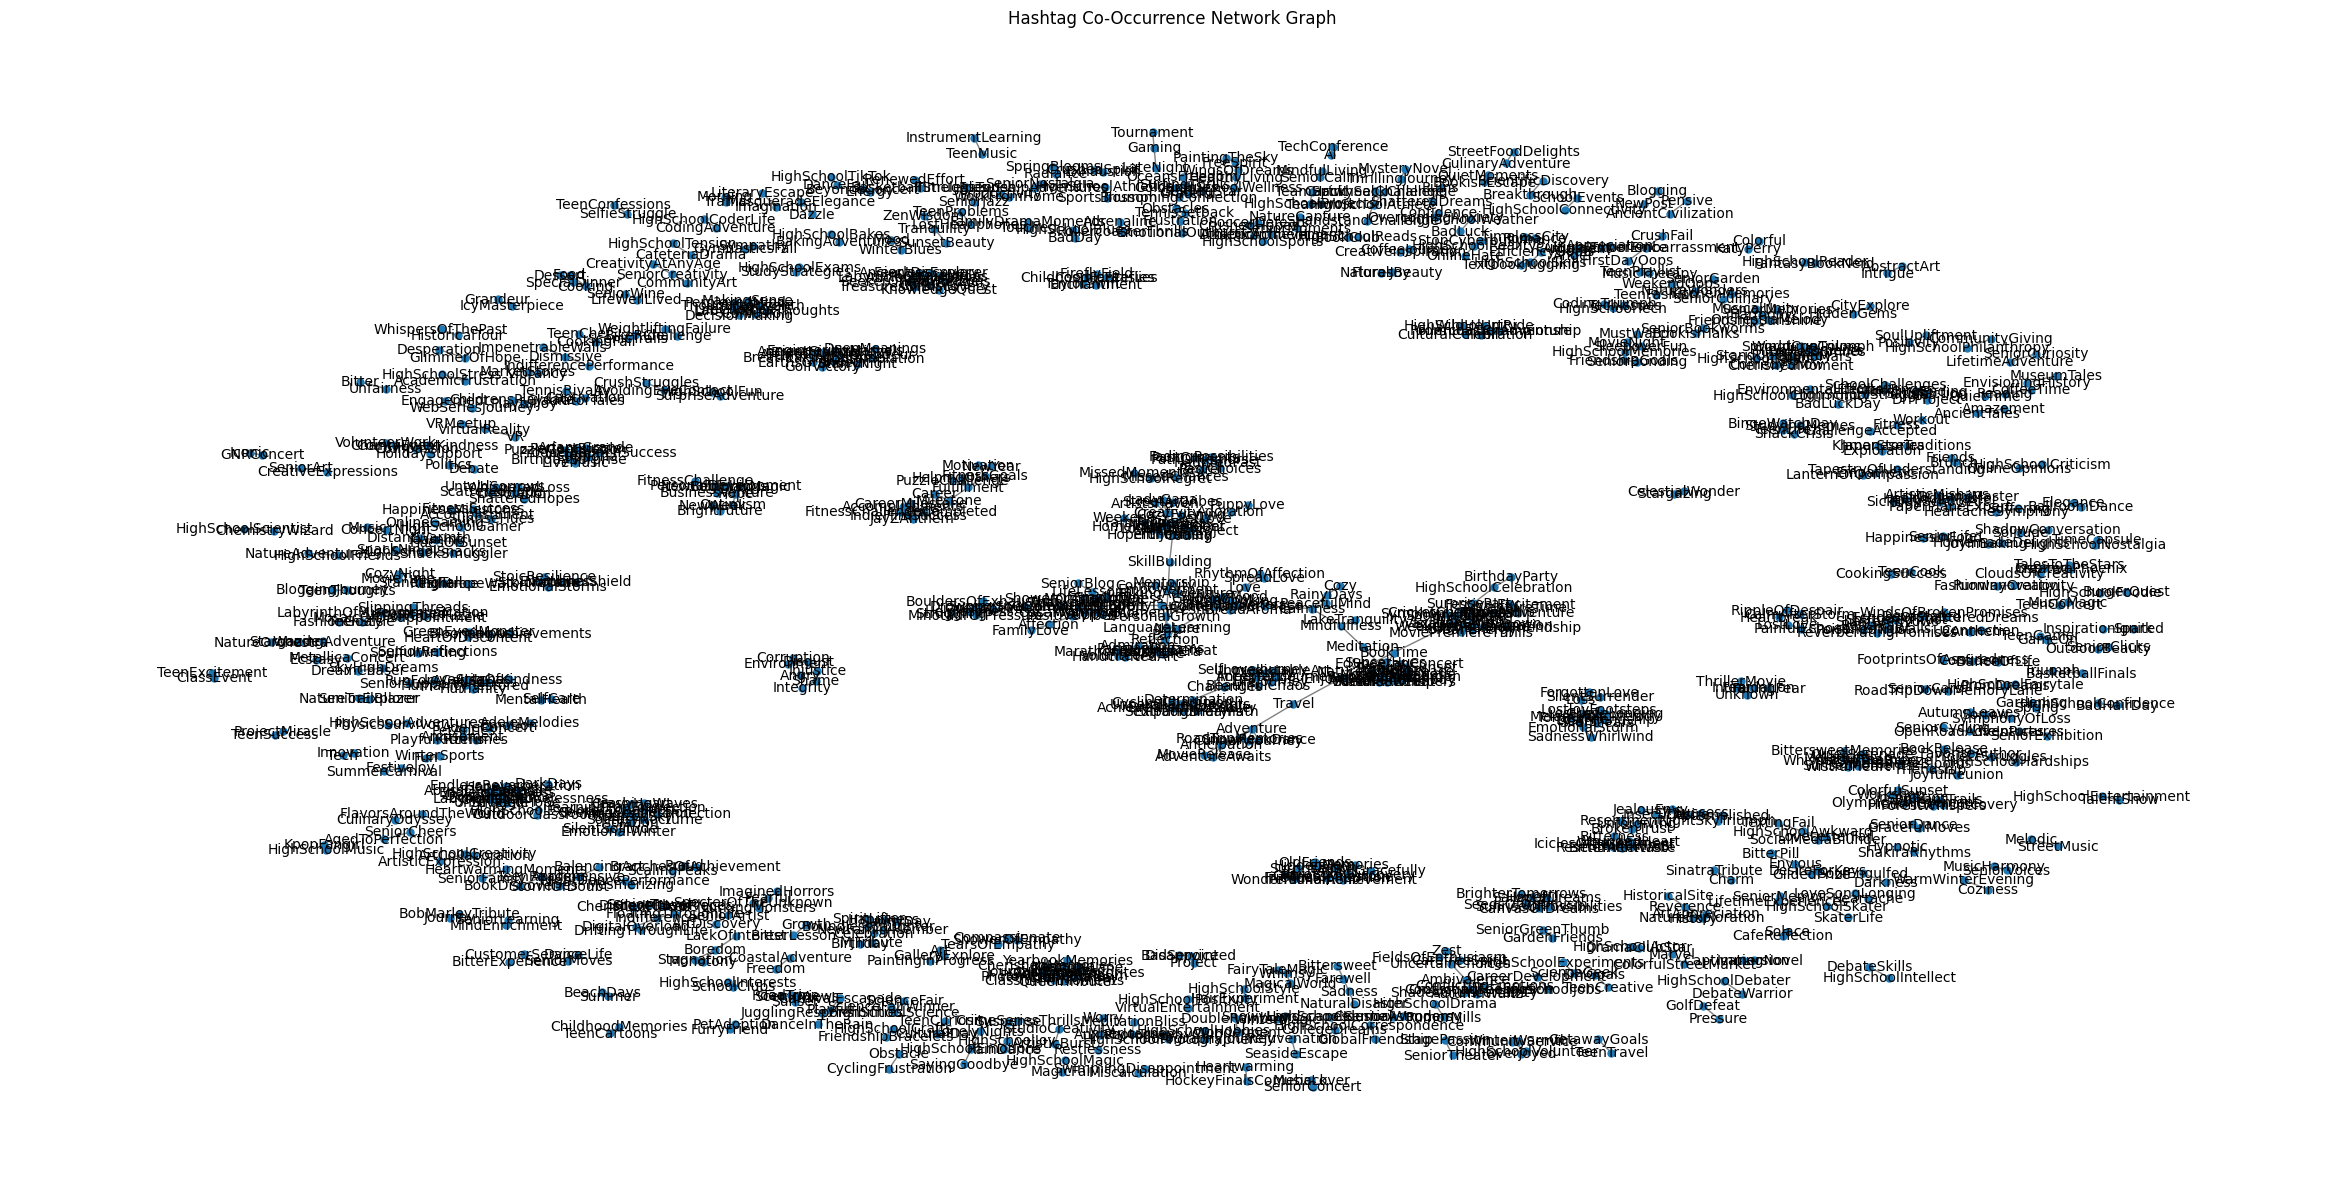

In [42]:
import networkx as nx
from itertools import combinations
import re
import matplotlib.pyplot as plt

# Extract hashtags from each post's hashtag string
def extract_hashtags(text):
    hashtags = re.findall(r"#(\w+)", text)
    return hashtags

# Create a new column containing list of hashtags
df['Hashtag_List'] = df['Hashtags'].apply(extract_hashtags)

# Filter only posts that include 2 or more hashtags
df_multi = df[df['Hashtag_List'].apply(lambda x: isinstance(x, list) and len(x) > 1)]

G = nx.Graph()

# Add edges between each pair of hashtags that co-occur
for tags in df_multi['Hashtag_List']:
    for pair in combinations(tags, 2):
        G.add_edge(*pair)

# Visualize the network of co-occurring hashtags
plt.figure(figsize=(30, 15))
nx.draw_networkx(G, node_size=25, with_labels=True, edge_color="gray", font_size=10)
plt.title("Hashtag Co-Occurrence Network Graph")
plt.axis('off')
plt.show()


30. Sarcasm or Polarity Shift Detection
  *  This code uses seaborn to create a bar plot that shows how many posts have mixed sentiment for each original sentiment label. It helps to visualize whether posts labeled as positive, negative, or neutral by the original source also contain words indicating mixed or potentially sarcastic sentiment.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


<function matplotlib.pyplot.show(close=None, block=None)>

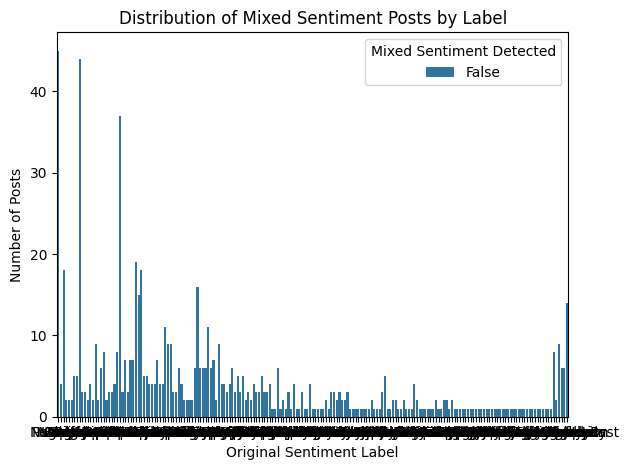

In [43]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import seaborn as sns
import matplotlib.pyplot as plt

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')  # Extra resource for tokenization

def clean_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)

    # Split into words
    words = nltk.word_tokenize(text)

    # Remove common stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # Apply lemmatization to reduce words to their base form
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    # Rejoin into a single string
    clean_text = ' '.join(words)

    return clean_text

# Clean the text column and store in a new column
df['clean_text'] = df['Text'].apply(clean_text)

# Define basic positive and negative word lists
positive_words = {'love', 'awesome', 'great', 'amazing'}
negative_words = {'bad', 'hate', 'slow', 'broken', 'disappointed'}

# Identify posts that contain both positive and negative words
def has_both_sentiments(text):
    words = set(text.lower().split())
    return bool(words & positive_words) and bool(words & negative_words)

# Create a new column to flag mixed sentiment posts
df['mixed_polarity'] = df['clean_text'].apply(has_both_sentiments)

# Plot the distribution of mixed polarity across sentiment labels
sns.countplot(x='Sentiment', hue='mixed_polarity', data=df)
plt.title("Distribution of Mixed Sentiment Posts by Label")
plt.xlabel("Original Sentiment Label")
plt.ylabel("Number of Posts")
plt.legend(title="Mixed Sentiment Detected")
plt.tight_layout()
plt.show
